# Regularization and Optimization in Neural Networks

## Regularization of NNs

Does regularization make sense in the context of neural networks? <br/>

Yes! We still have all of the salient ingredients: a loss function, overfitting vs. underfitting, and coefficients (weights) that could get too large.

But there are now a few different flavors besides L1 and L2 regularization. (Note that L1 regularization is not common in the context of  neural networks.)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
wine = pd.read_csv('wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
X = wine.drop('quality', axis=1)
y = wine.quality

In [4]:
wine['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=11, stratify=y)
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

/Users/gdamico/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/gdamico/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/gdamico/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
model = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [10]:
history = model.fit(X_train_s, y_train, validation_data=(X_test_s, y_test),
                   epochs=30, batch_size=None)

Instructions for updating:
Use tf.cast instead.
Train on 4872 samples, validate on 1625 samples
Epoch 1/30
4872/4872 [==============================] - 0s 57us/step - loss: 2.2038 - acc: 0.2073 - val_loss: 1.7907 - val_acc: 0.4037
Epoch 2/30
4872/4872 [==============================] - 0s 24us/step - loss: 1.5602 - acc: 0.4780 - val_loss: 1.3833 - val_acc: 0.5022
Epoch 3/30
4872/4872 [==============================] - 0s 24us/step - loss: 1.2880 - acc: 0.5226 - val_loss: 1.2361 - val_acc: 0.5206
Epoch 4/30
4872/4872 [==============================] - 0s 24us/step - loss: 1.1911 - acc: 0.5339 - val_loss: 1.1888 - val_acc: 0.5231
Epoch 5/30
4872/4872 [==============================] - 0s 24us/step - loss: 1.1504 - acc: 0.5411 - val_loss: 1.1643 - val_acc: 0.5237
Epoch 6/30
4872/4872 [==============================] - 0s 25us/step - loss: 1.1265 - acc: 0.5439 - val_loss: 1.1481 - val_acc: 0.5323
Epoch 7/30
4872/4872 [==============================] - 0s 25us/step - loss: 1.1100 - acc: 0.5

In [135]:
for layer in model.layers:
    print(layer.get_weights())

[array([[-0.03638703, -0.11431559,  0.4577274 , -0.06667943,  0.18326788,
        -0.61004126,  0.33907658,  0.26955926, -0.6192482 ,  0.06234331,
        -0.30006433,  0.277624  ],
       [ 0.10905323, -0.456263  ,  0.63094556, -0.22032613, -0.66194373,
        -0.33986938,  0.23010273, -0.11522841,  0.5767498 , -0.4079036 ,
         0.731156  , -0.15089917],
       [ 0.30610386,  0.11713936, -0.22888887, -0.21414952, -0.20850481,
         0.47768387,  0.02805647,  0.00534306, -0.1731033 , -0.06782998,
         0.04679343, -0.00476062],
       [ 0.36303008,  0.02586806,  0.26600435, -0.6871539 ,  0.157758  ,
         0.58569413, -0.30117345,  0.24991429, -0.18791251,  0.3175496 ,
        -0.37928405, -0.481422  ],
       [ 0.3524185 ,  0.289836  ,  0.28531513,  0.13718858, -0.6772856 ,
         0.12614919, -0.23211402, -0.6863566 ,  0.3106957 ,  0.14468144,
        -0.03221573,  0.6262607 ],
       [-0.10011648,  0.3333215 , -0.138564  , -0.04726948, -0.43072665,
         0.25610545, 

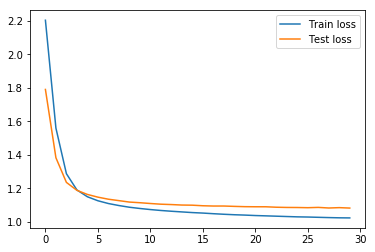

In [11]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

## Adding Regularization

In [12]:
from keras import regularizers

model_r = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_r.add(Dense(n_hidden, input_dim=n_input, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))
model_r.add(Dense(10, activation='softmax',
                 kernel_regularizer=regularizers.l2(0.01)))

model_r.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history_r = model_r.fit(X_train_s, y_train, validation_data=(X_test_s, y_test),
                       epochs=42, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 0s 65us/step - loss: 2.3777 - acc: 0.2352 - val_loss: 1.9442 - val_acc: 0.3975
Epoch 2/42
4872/4872 [==============================] - 0s 26us/step - loss: 1.6998 - acc: 0.4310 - val_loss: 1.5552 - val_acc: 0.4720
Epoch 3/42
4872/4872 [==============================] - 0s 27us/step - loss: 1.4713 - acc: 0.5010 - val_loss: 1.4371 - val_acc: 0.5095
Epoch 4/42
4872/4872 [==============================] - 0s 25us/step - loss: 1.3841 - acc: 0.5324 - val_loss: 1.3765 - val_acc: 0.5280
Epoch 5/42
4872/4872 [==============================] - 0s 26us/step - loss: 1.3317 - acc: 0.5456 - val_loss: 1.3371 - val_acc: 0.5237
Epoch 6/42
4872/4872 [==============================] - 0s 26us/step - loss: 1.2943 - acc: 0.5503 - val_loss: 1.3080 - val_acc: 0.5348
Epoch 7/42
4872/4872 [==============================] - 0s 25us/step - loss: 1.2668 - acc: 0.5507 - val_loss: 1.2846 - val_acc: 0.5311
Epoch 8

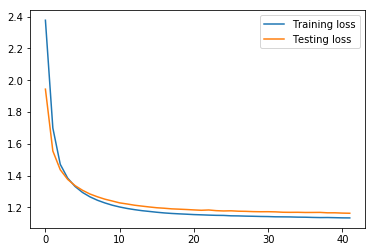

In [13]:
plt.plot(history_r.history['loss'], label='Training loss')
plt.plot(history_r.history['val_loss'], label='Testing loss')
plt.legend();

In [15]:
model_r.predict(X_test_s[:5]).round(2)

array([[0.  , 0.  , 0.  , 0.01, 0.06, 0.37, 0.46, 0.08, 0.02, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.05, 0.5 , 0.4 , 0.04, 0.01, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.07, 0.78, 0.13, 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.01, 0.04, 0.57, 0.33, 0.04, 0.01, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.08, 0.71, 0.19, 0.01, 0.  , 0.  ]],
      dtype=float32)

In [16]:
y_test[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

### Dropout

Here's a new regularization idea: Turn some neurons off during training. We'll assign probabilities of 'dropout' and then let fate decide.

$\rightarrow$ Why is this a good idea? *Is* it a good idea?

Was this sort of regularization available to us before? Why (not)?

In [18]:
from keras.layers import Dropout

model_d = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_d.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model_d.add(Dropout(rate=0.2))
model_d.add(Dense(10, activation='softmax'))

model_d.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history_d = model_d.fit(X_train_s, y_train, validation_data=(X_test_s, y_test),
                       epochs=42, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 0s 79us/step - loss: 2.0313 - acc: 0.2995 - val_loss: 1.6574 - val_acc: 0.3489
Epoch 2/42
4872/4872 [==============================] - 0s 28us/step - loss: 1.5136 - acc: 0.4035 - val_loss: 1.3458 - val_acc: 0.4406
Epoch 3/42
4872/4872 [==============================] - 0s 28us/step - loss: 1.3305 - acc: 0.4602 - val_loss: 1.2351 - val_acc: 0.4843
Epoch 4/42
4872/4872 [==============================] - 0s 30us/step - loss: 1.2442 - acc: 0.4865 - val_loss: 1.1841 - val_acc: 0.5003
Epoch 5/42
4872/4872 [==============================] - 0s 28us/step - loss: 1.2081 - acc: 0.4938 - val_loss: 1.1557 - val_acc: 0.5095
Epoch 6/42
4872/4872 [==============================] - 0s 29us/step - loss: 1.1703 - acc: 0.5125 - val_loss: 1.1363 - val_acc: 0.5237
Epoch 7/42
4872/4872 [==============================] - 0s 29us/step - loss: 1.1513 - acc: 0.5248 - val_loss: 1.1258 - val_acc: 0.5305
Epoch 8

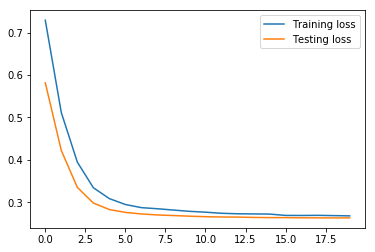

In [147]:
plt.plot(history_d.history['loss'], label='Training loss')
plt.plot(history_d.history['val_loss'], label='Testing loss')
plt.legend();

In [148]:
history_d.history['acc'][-1], history_d.history['val_acc'][-1]

(0.8684905207607351, 0.8650549682103671)

### Early Stopping

Another idea is to try to terminate the training process early, even before some pre-specified number of epochs.

$\rightarrow$ Why is this a good idea? *Is* it a good idea?

Was this sort of regularization available to us before? Why (not)?

In [149]:
from keras.callbacks import EarlyStopping

In [22]:
from keras.callbacks import EarlyStopping

model_es = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_es.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model_es.add(Dense(10, activation='softmax'))

model_es.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1,
                           mode='auto')

callbacks_list = [early_stop]

history_es = model_es.fit(X_train_s, y_train, validation_data=(X_test_s, y_test),
                         epochs=20, batch_size=None, callbacks=callbacks_list)

Train on 4872 samples, validate on 1625 samples
Epoch 1/20
4872/4872 [==============================] - 0s 79us/step - loss: 1.9246 - acc: 0.4107 - val_loss: 1.6102 - val_acc: 0.4283
Epoch 2/20
4872/4872 [==============================] - 0s 25us/step - loss: 1.4502 - acc: 0.4575 - val_loss: 1.3689 - val_acc: 0.4498
Epoch 3/20
4872/4872 [==============================] - 0s 26us/step - loss: 1.2888 - acc: 0.4865 - val_loss: 1.2661 - val_acc: 0.4702
Epoch 4/20
4872/4872 [==============================] - 0s 26us/step - loss: 1.2115 - acc: 0.5062 - val_loss: 1.2113 - val_acc: 0.5095
Epoch 5/20
4872/4872 [==============================] - 0s 29us/step - loss: 1.1683 - acc: 0.5252 - val_loss: 1.1798 - val_acc: 0.5225
Epoch 6/20
4872/4872 [==============================] - 0s 25us/step - loss: 1.1415 - acc: 0.5335 - val_loss: 1.1621 - val_acc: 0.5188
Epoch 7/20
4872/4872 [==============================] - 0s 26us/step - loss: 1.1248 - acc: 0.5437 - val_loss: 1.1490 - val_acc: 0.5200
Epoch 8

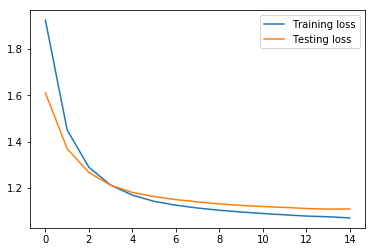

In [23]:
plt.plot(history_es.history['loss'], label='Training loss')
plt.plot(history_es.history['val_loss'], label='Testing loss')
plt.legend();